In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Projects\price.csv',
                names=['Transaction_unique_identifier', 'price', 'Date_of_Transfer', 'postcode', 'Property_Type', 'Old/New',
                       'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District', 'County', 'PPDCategory_Type',
                        'Record_Status - monthly_file_only'],
                 parse_dates=['Date_of_Transfer']).drop(columns=['PPDCategory_Type', 'Record_Status - monthly_file_only'])

In [3]:
df['year'] = df['Date_of_Transfer'].dt.year

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28276228 entries, 0 to 28276227
Data columns (total 15 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Transaction_unique_identifier  object        
 1   price                          int64         
 2   Date_of_Transfer               datetime64[ns]
 3   postcode                       object        
 4   Property_Type                  object        
 5   Old/New                        object        
 6   Duration                       object        
 7   PAON                           object        
 8   SAON                           object        
 9   Street                         object        
 10  Locality                       object        
 11  Town/City                      object        
 12  District                       object        
 13  County                         object        
 14  year                           int32         
dtypes: datetime64

In [5]:
df1 = df.sample(n=100000)

<Axes: xlabel='Date_of_Transfer', ylabel='price'>

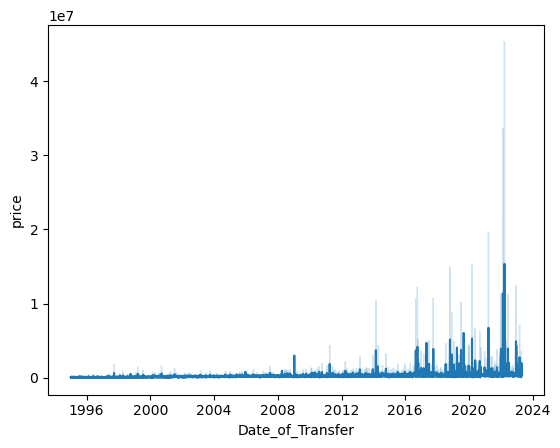

In [6]:
sns.lineplot(data = df1,x='Date_of_Transfer',y='price')

In [7]:
df1.sort_values(by = 'price',ascending=False)

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,year
27320804,{DE2D0CE0-8FEF-51EE-E053-6C04A8C00671},150000000,2022-03-24,EC1Y 1AX,O,N,F,99,NaN,CITY ROAD,NaN,LONDON,ISLINGTON,GREATER LONDON,2022
27942501,{F87E72F9-C09C-176C-E053-6B04A8C0D2BE},132500000,2022-02-16,SL0 9JQ,O,N,F,UNIT 1G,NaN,THE RIDGEWAY,NaN,IVER,BUCKINGHAMSHIRE,BUCKINGHAMSHIRE,2022
26646712,{C6209F60-42AD-295E-E053-6C04A8C0DDCC},96450000,2021-03-22,WC2N 4ER,O,N,F,36,NaN,ST MARTINS LANE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,2021
27944518,{F87E72F9-C0CF-176C-E053-6B04A8C0D2BE},68727500,2022-12-20,MK10 0BA,O,N,L,TESCO STORE,NaN,WINCHESTER CIRCLE,KINGSTON,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,2022
21108400,{42A5A70A-09D9-56E8-E050-A8C06205331E},68400000,2016-08-30,W1D 3RG,O,N,F,2 - 4,NaN,DEAN STREET,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967649,{2A289E9E-FFAA-CDC8-E050-A8C063054829},250,1996-03-20,BS37 4JT,T,N,F,27,NaN,CRANHAM,YATE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,1996
24561321,{8CAC1318-F6BA-0253-E053-6B04A8C08E51},225,2019-06-03,BS9 2JW,O,N,F,8,NaN,EAST PARADE,NaN,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,2019
24164978,{8CAC1319-1B62-0253-E053-6B04A8C08E51},200,2018-12-13,NE25 9AP,O,N,F,2,NaN,VALLEY GARDENS,NaN,WHITLEY BAY,NORTH TYNESIDE,TYNE AND WEAR,2018
24943428,{93E6821F-2F8B-40FD-E053-6B04A8C0C1DF},185,2019-09-02,FY7 6RQ,O,N,F,11,NaN,BYRON STREET,NaN,FLEETWOOD,WYRE,LANCASHIRE,2019


In [8]:
df2=df1[df1['price']<50000000]

<Axes: xlabel='Date_of_Transfer', ylabel='price'>

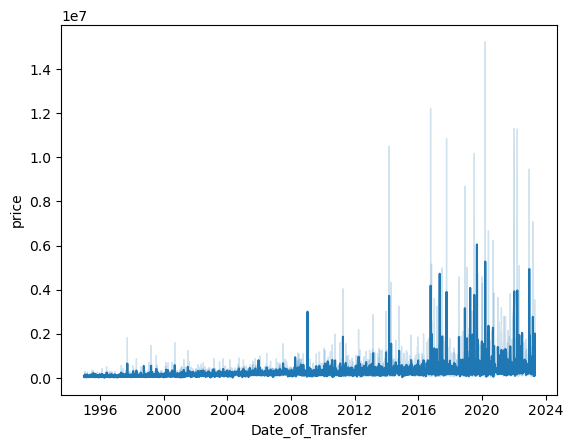

In [9]:
sns.lineplot(data = df2,x='Date_of_Transfer',y='price')

<Axes: xlabel='year', ylabel='price'>

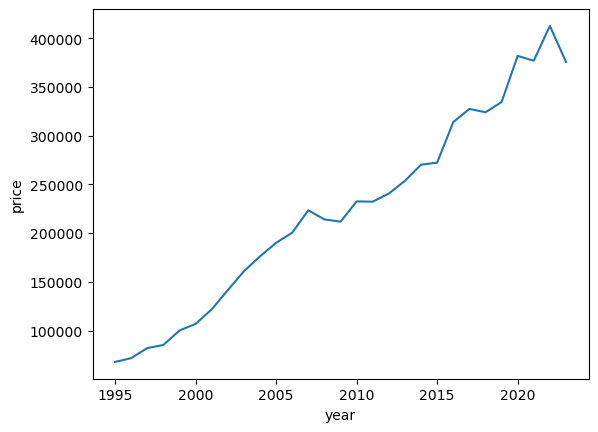

In [10]:
meanbyyear = df2.groupby('year').mean('price')
sns.lineplot(data = meanbyyear,x = 'year',y = 'price' )

In [11]:
from bs4 import BeautifulSoup
import requests
import re
URL = 'https://www.officialdata.org/uk/inflation/1995?endYear=2021&amount=1'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
           
page = requests.get(URL,headers = headers)           

soup = BeautifulSoup(page.content,"html.parser")
           
soup1 = BeautifulSoup(soup.prettify(),"html.parser")
     


rows1 = soup1.find('table',class_ ="regular-data table-striped").find_all('tr')

dfinf = pd.DataFrame(columns = ['Year1','Pound Value','Inflation Rate'])

for row in rows1[1:]:
    b2 = row.find_all('td')
    b3 = [tr.text for tr in b2]
    l = len(dfinf)
    dfinf.loc[l] = b3
    
dfinf.replace('(^\n+|\n+$)', '', regex=True, inplace=True)
dfinf['Year_new'] = dfinf['Year1'].str.split('\n').str[0]
dfinf['Inflation_Rate_new'] = dfinf['Inflation Rate'].str.split('\n').str[0]
newdfinf = dfinf.drop(["Inflation Rate",'Year1','Pound Value'], axis='columns')
newdfinf.at[28,"Inflation_Rate_new"] = '6.70%'
print(newdfinf)

             Year_new   Inflation_Rate_new
0                1995                3.47%
1                1996                2.41%
2                1997                3.14%
3                1998                3.43%
4                1999                1.54%
5                2000                2.96%
6                2001                1.77%
7                2002                1.67%
8                2003                2.89%
9                2004                2.98%
10               2005                2.82%
11               2006                3.20%
12               2007                4.29%
13               2008                3.99%
14               2009               -0.53%
15               2010                4.61%
16               2011                5.20%
17               2012                3.21%
18               2013                3.04%
19               2014                2.36%
20               2015                0.99%
21               2016                1.74%
22         

<Axes: xlabel='year', ylabel='counts'>

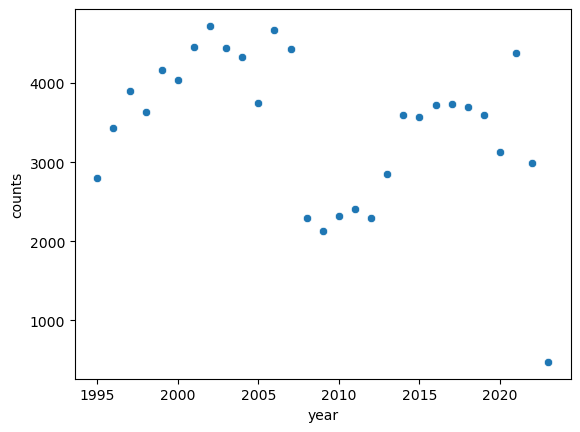

In [12]:
meanbyyear = df2.groupby('year')['Transaction_unique_identifier'].count().reset_index(name='counts')
sns.scatterplot(data = meanbyyear,x = 'year',y = 'counts' )

In [29]:
meanbyyear1 = df2.groupby('year').mean('price')
listnew = []
listnew.insert(0, 0.0000)
for i in range(28):
    k = i + 1
    listnew.insert(k,((meanbyyear1.iat[k,0] - meanbyyear1.iat[i,0]) / meanbyyear1.iat[i,0])*100)
    
meanbyyear1['Inflation_Rate_new1'] = listnew

union_dfs = pd.concat([meanbyyear1, newdfinf], ignore_index=True)

union_dfs['Inflation_Rate_new'] = union_dfs['Inflation_Rate_new'].str.replace(r'%', '', regex=True)


price                  float64
Inflation_Rate_new1    float64
Year_new                object
Inflation_Rate_new     float64
dtype: object

<Axes: xlabel='Year_new', ylabel='Inflation_Rate_new'>

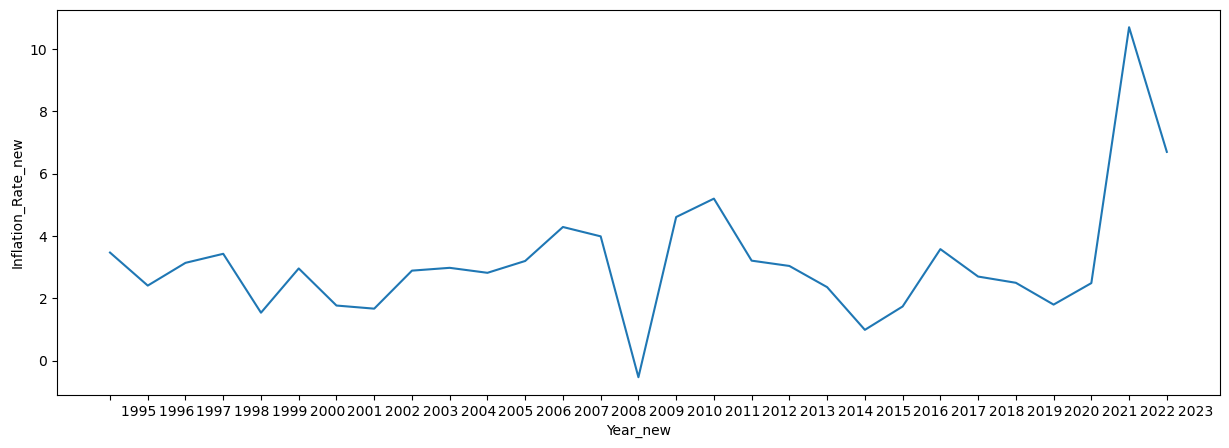

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
union_dfs = union_dfs.astype({'Inflation_Rate_new': 'float'})
sns.lineplot(data = union_dfs,x = 'Year_new',y = 'Inflation_Rate_new',ax=ax)


In [41]:
listnew2 = []
for i in range(29):
    k = i + 29
    listnew2.insert(k,union_dfs.iat[k,2])
listnew3 =  listnew2 * 2
union_dfs['Year_new'] = listnew3

union_dfs = union_dfs.round(2)

union_dfs['Inflation_Rate_new'] = union_dfs['Inflation_Rate_new'].combine_first(union_dfs['Inflation_Rate_new1'])


listnew3 = []

for i in range(58):
    if i <= 28:
        listnew3.append('MeanRate')
    else:
        listnew3.append('Inflation')
union_dfs['Hue'] = listnew3
union_dfs = union_dfs.drop(columns=['Inflation_Rate_new1', 'price'])

In [45]:
union_dfs.dtypes

price                  float64
Inflation_Rate_new1    float64
Year_new                object
Inflation_Rate_new     float64
Hue                     object
dtype: object

<Axes: xlabel='Year_new', ylabel='Inflation_Rate_new'>

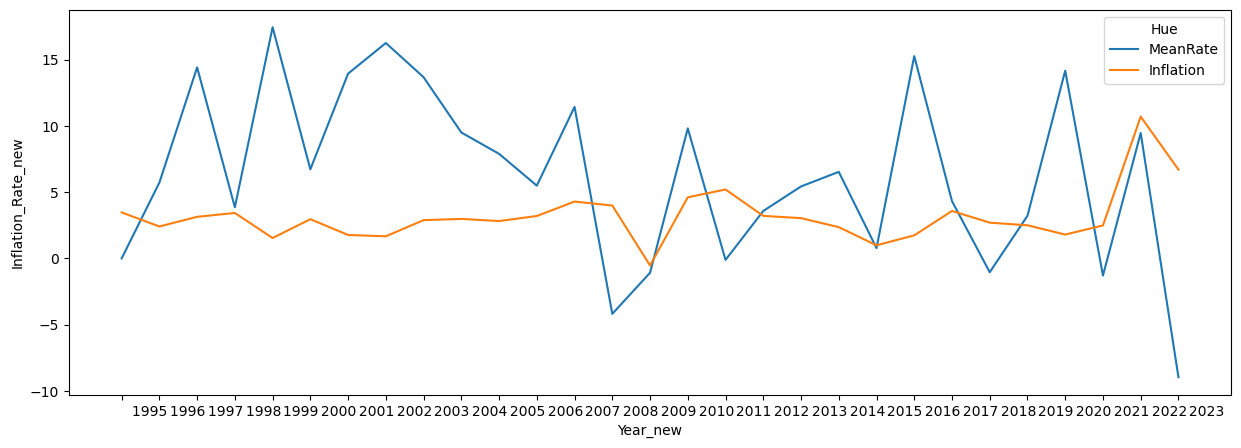

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data = union_dfs,x = 'Year_new',y = 'Inflation_Rate_new',hue="Hue",ax=ax)